In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
pd.set_option('display.max_columns',None)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.datasets import load_digits

In [ ]:
vac = pd.read_csv('Vaccine.csv')
vac

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [ ]:
#shape of the dataset

vac.shape

(26707, 34)

In [ ]:
vac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [ ]:
# most of the values are numerical
# proceeding with other pre processing

for i in vac.columns:
    print('unique values in',i)
    print(vac[i].unique())
    print('value count of',i)
    print(vac[i].value_counts())
    print('*****************************')

unique values in unique_id
[    0     1     2 ... 26704 26705 26706]
value count of unique_id
unique_id
26706    1
0        1
1        1
26690    1
26689    1
        ..
7        1
6        1
5        1
4        1
3        1
Name: count, Length: 26707, dtype: int64
*****************************
unique values in h1n1_worry
[ 1.  3.  2.  0. nan]
value count of h1n1_worry
h1n1_worry
2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: count, dtype: int64
*****************************
unique values in h1n1_awareness
[ 0.  2.  1. nan]
value count of h1n1_awareness
h1n1_awareness
1.0    14598
2.0     9487
0.0     2506
Name: count, dtype: int64
*****************************
unique values in antiviral_medication
[ 0.  1. nan]
value count of antiviral_medication
antiviral_medication
0.0    25335
1.0     1301
Name: count, dtype: int64
*****************************
unique values in contact_avoidance
[ 0.  1. nan]
value count of contact_avoidance
contact_avoidance
1.0    19228
0.0     7271
Na

In [ ]:
vac

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [ ]:
vac.isnull().sum()

,0
unique_id,0
h1n1_worry,92
h1n1_awareness,116
antiviral_medication,71
contact_avoidance,208
bought_face_mask,19
wash_hands_frequently,42
avoid_large_gatherings,87
reduced_outside_home_cont,82
avoid_touch_face,128


In [ ]:
# null value treatment
# most of the values are either 0 or 1. So I chose to backfill the missing values with the most occuring ones

vac.has_health_insur = vac.has_health_insur.fillna(vac.has_health_insur.mode().iloc[0])
vac.h1n1_worry = vac.h1n1_worry.fillna(vac.h1n1_worry.mode().iloc[0])
vac.h1n1_awareness = vac.h1n1_awareness.fillna(vac.h1n1_awareness.mode().iloc[0])
vac.antiviral_medication = vac.antiviral_medication.fillna(vac.antiviral_medication.mode().iloc[0])
vac.contact_avoidance = vac.contact_avoidance.fillna(vac.contact_avoidance.mode().iloc[0])
vac.bought_face_mask = vac.bought_face_mask.fillna(vac.bought_face_mask.mode().iloc[0])
vac.wash_hands_frequently = vac.wash_hands_frequently.fillna(vac.wash_hands_frequently.mode().iloc[0])
vac.avoid_large_gatherings = vac.avoid_large_gatherings.fillna(vac.avoid_large_gatherings.mode().iloc[0])
vac.reduced_outside_home_cont = vac.reduced_outside_home_cont.fillna(vac.reduced_outside_home_cont.mode().iloc[0])
vac.avoid_touch_face = vac.avoid_touch_face.fillna(vac.avoid_touch_face.mode().iloc[0])
vac.dr_recc_h1n1_vacc = vac.dr_recc_h1n1_vacc.fillna(vac.dr_recc_h1n1_vacc.mode().iloc[0])
vac.dr_recc_seasonal_vacc = vac.dr_recc_seasonal_vacc.fillna(vac.dr_recc_seasonal_vacc.mode().iloc[0])
vac.chronic_medic_condition = vac.chronic_medic_condition.fillna(vac.chronic_medic_condition.mode().iloc[0])
vac.cont_child_undr_6_mnths = vac.cont_child_undr_6_mnths.fillna(vac.cont_child_undr_6_mnths.mode().iloc[0])
vac.is_health_worker = vac.is_health_worker.fillna(vac.is_health_worker.mode().iloc[0])
vac.is_h1n1_vacc_effective = vac.is_h1n1_vacc_effective.fillna(vac.is_h1n1_vacc_effective.mode().iloc[0])
vac.is_h1n1_risky = vac.is_h1n1_risky.fillna(vac.is_h1n1_risky.mode().iloc[0])
vac.sick_from_h1n1_vacc = vac.sick_from_h1n1_vacc.fillna(vac.sick_from_h1n1_vacc.mode().iloc[0])
vac.is_seas_vacc_effective = vac.is_seas_vacc_effective.fillna(vac.is_seas_vacc_effective.mode().iloc[0])
vac.is_seas_risky = vac.is_seas_risky.fillna(vac.is_seas_risky.mode().iloc[0])
vac.sick_from_seas_vacc = vac.sick_from_seas_vacc.fillna(vac.sick_from_seas_vacc.mode().iloc[0])
vac.qualification = vac.qualification.fillna(vac.qualification.mode().iloc[0])
vac.marital_status = vac.marital_status.fillna(vac.marital_status.mode().iloc[0])
vac.housing_status = vac.housing_status.fillna(vac.housing_status.mode().iloc[0])
vac.employment = vac.employment.fillna(vac.employment.mode().iloc[0])
vac.no_of_adults = vac.no_of_adults.fillna(0)
vac.no_of_children = vac.no_of_children.fillna(0)
vac.income_level = vac.income_level.fillna(vac.income_level.mode().iloc[0])


In [ ]:
vac.isnull().sum()

,0
unique_id,0
h1n1_worry,0
h1n1_awareness,0
antiviral_medication,0
contact_avoidance,0
bought_face_mask,0
wash_hands_frequently,0
avoid_large_gatherings,0
reduced_outside_home_cont,0
avoid_touch_face,0


In [ ]:
# converting all the categorical values using label encoder and ordinal encoder
vac.age_bracket = OrdinalEncoder().fit_transform(vac[['age_bracket']])
vac.qualification = OrdinalEncoder().fit_transform(vac[['qualification']])
vac.race = OrdinalEncoder().fit_transform(vac[['race']])
vac.sex = OrdinalEncoder().fit_transform(vac[['sex']])
vac.marital_status = OrdinalEncoder().fit_transform(vac[['marital_status']])
vac.housing_status = OrdinalEncoder().fit_transform(vac[['housing_status']])
vac.employment = OrdinalEncoder().fit_transform(vac[['employment']])
vac.census_msa = OrdinalEncoder().fit_transform(vac[['census_msa']])
vac.income_level = OrdinalEncoder().fit_transform(vac[['income_level']])







In [ ]:
vac['census_msa'].unique()

array([2., 0., 1.])

In [ ]:
vac

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,3.0,1.0,3.0,0.0,2.0,1.0,0.0,1.0,2.0,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,1.0,0.0,3.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,0.0,2.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,4.0,0.0,3.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,2.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,3.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,0.0,2.0,3.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,2.0,5.0,4.0,2.0,3.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0


In [ ]:
vac.drop('unique_id',axis=1,inplace=True)

In [ ]:
vac.head(5)

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,3.0,1.0,3.0,0.0,2.0,1.0,0.0,1.0,2.0,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,1.0,0.0,3.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,0.0,2.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,4.0,0.0,3.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,2.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


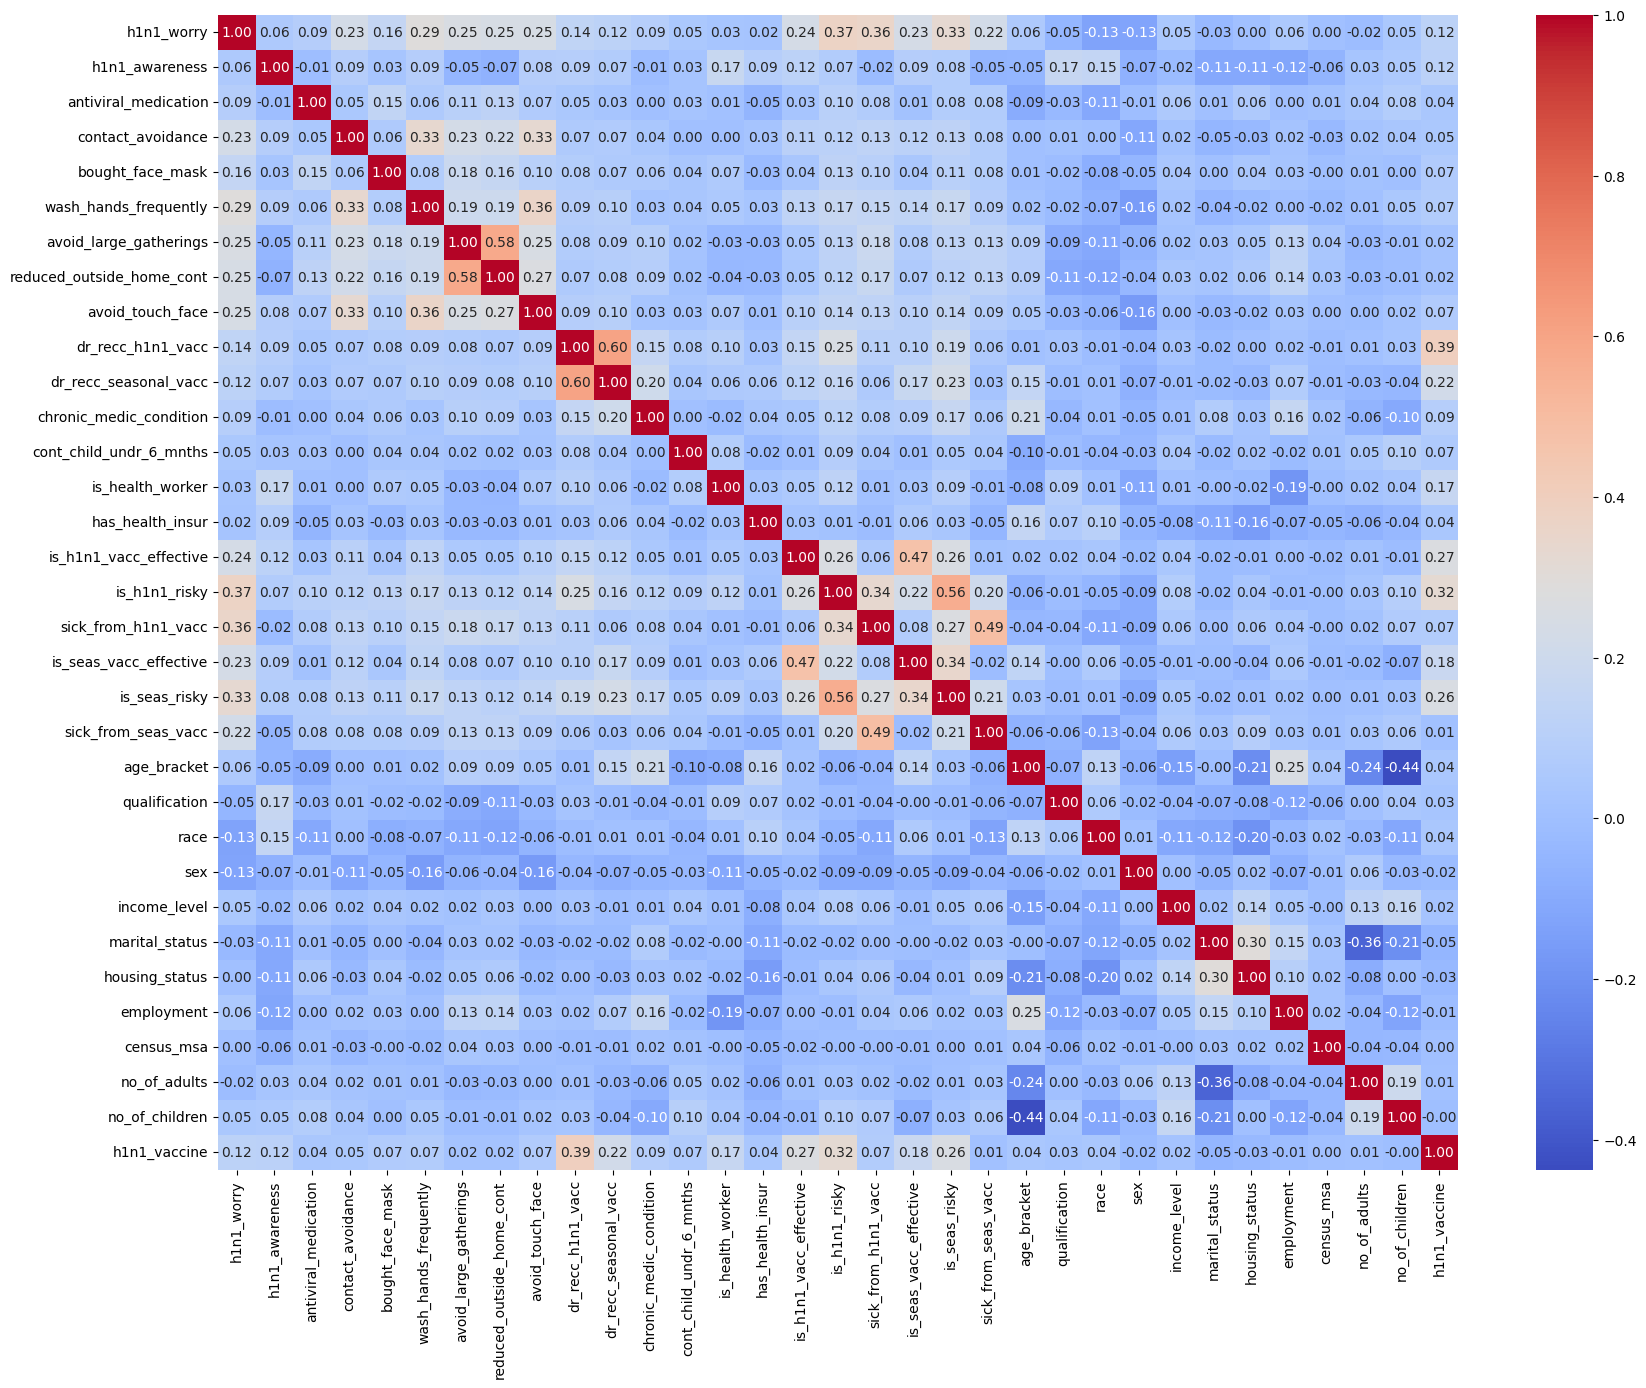

In [ ]:
# checking correlation between columns

df_corr = vac.corr()
plt.figure(figsize=(20,15))
sns.heatmap(df_corr,annot=True,cmap='coolwarm',fmt='0.2f')
plt.show()

In [ ]:
vac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26707 non-null  float64
 1   h1n1_awareness             26707 non-null  float64
 2   antiviral_medication       26707 non-null  float64
 3   contact_avoidance          26707 non-null  float64
 4   bought_face_mask           26707 non-null  float64
 5   wash_hands_frequently      26707 non-null  float64
 6   avoid_large_gatherings     26707 non-null  float64
 7   reduced_outside_home_cont  26707 non-null  float64
 8   avoid_touch_face           26707 non-null  float64
 9   dr_recc_h1n1_vacc          26707 non-null  float64
 10  dr_recc_seasonal_vacc      26707 non-null  float64
 11  chronic_medic_condition    26707 non-null  float64
 12  cont_child_undr_6_mnths    26707 non-null  float64
 13  is_health_worker           26707 non-null  flo

In [ ]:
# most of the values are in float
# but we need either 1 or 0 in order to predict h1n1_vaccine col

vac_final = vac.astype({'h1n1_worry': int,'h1n1_awareness': int,'antiviral_medication': int,'contact_avoidance': int,'bought_face_mask': int,
                        'wash_hands_frequently':int,'avoid_large_gatherings':int,'reduced_outside_home_cont':int,'avoid_touch_face':int,
                        'dr_recc_h1n1_vacc':int,'dr_recc_seasonal_vacc':int,'chronic_medic_condition':int,'cont_child_undr_6_mnths':int,
                        'is_health_worker':int,'has_health_insur':int,'is_h1n1_vacc_effective':int,'is_h1n1_risky':int,'sick_from_h1n1_vacc':int,
                        'is_seas_vacc_effective':int,'is_seas_risky':int,'sick_from_seas_vacc':int,'age_bracket':int,'qualification':int,'race':int,
                        'race':int,'sex':int,'marital_status':int,'housing_status':int,'employment':int,'census_msa':int,'income_level':int,
                        'no_of_adults':int,'no_of_children':int})

In [ ]:
vac_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   h1n1_worry                 26707 non-null  int64
 1   h1n1_awareness             26707 non-null  int64
 2   antiviral_medication       26707 non-null  int64
 3   contact_avoidance          26707 non-null  int64
 4   bought_face_mask           26707 non-null  int64
 5   wash_hands_frequently      26707 non-null  int64
 6   avoid_large_gatherings     26707 non-null  int64
 7   reduced_outside_home_cont  26707 non-null  int64
 8   avoid_touch_face           26707 non-null  int64
 9   dr_recc_h1n1_vacc          26707 non-null  int64
 10  dr_recc_seasonal_vacc      26707 non-null  int64
 11  chronic_medic_condition    26707 non-null  int64
 12  cont_child_undr_6_mnths    26707 non-null  int64
 13  is_health_worker           26707 non-null  int64
 14  has_health_insur      

In [ ]:
vac_final.to_csv('vac_final.csv',index=False)

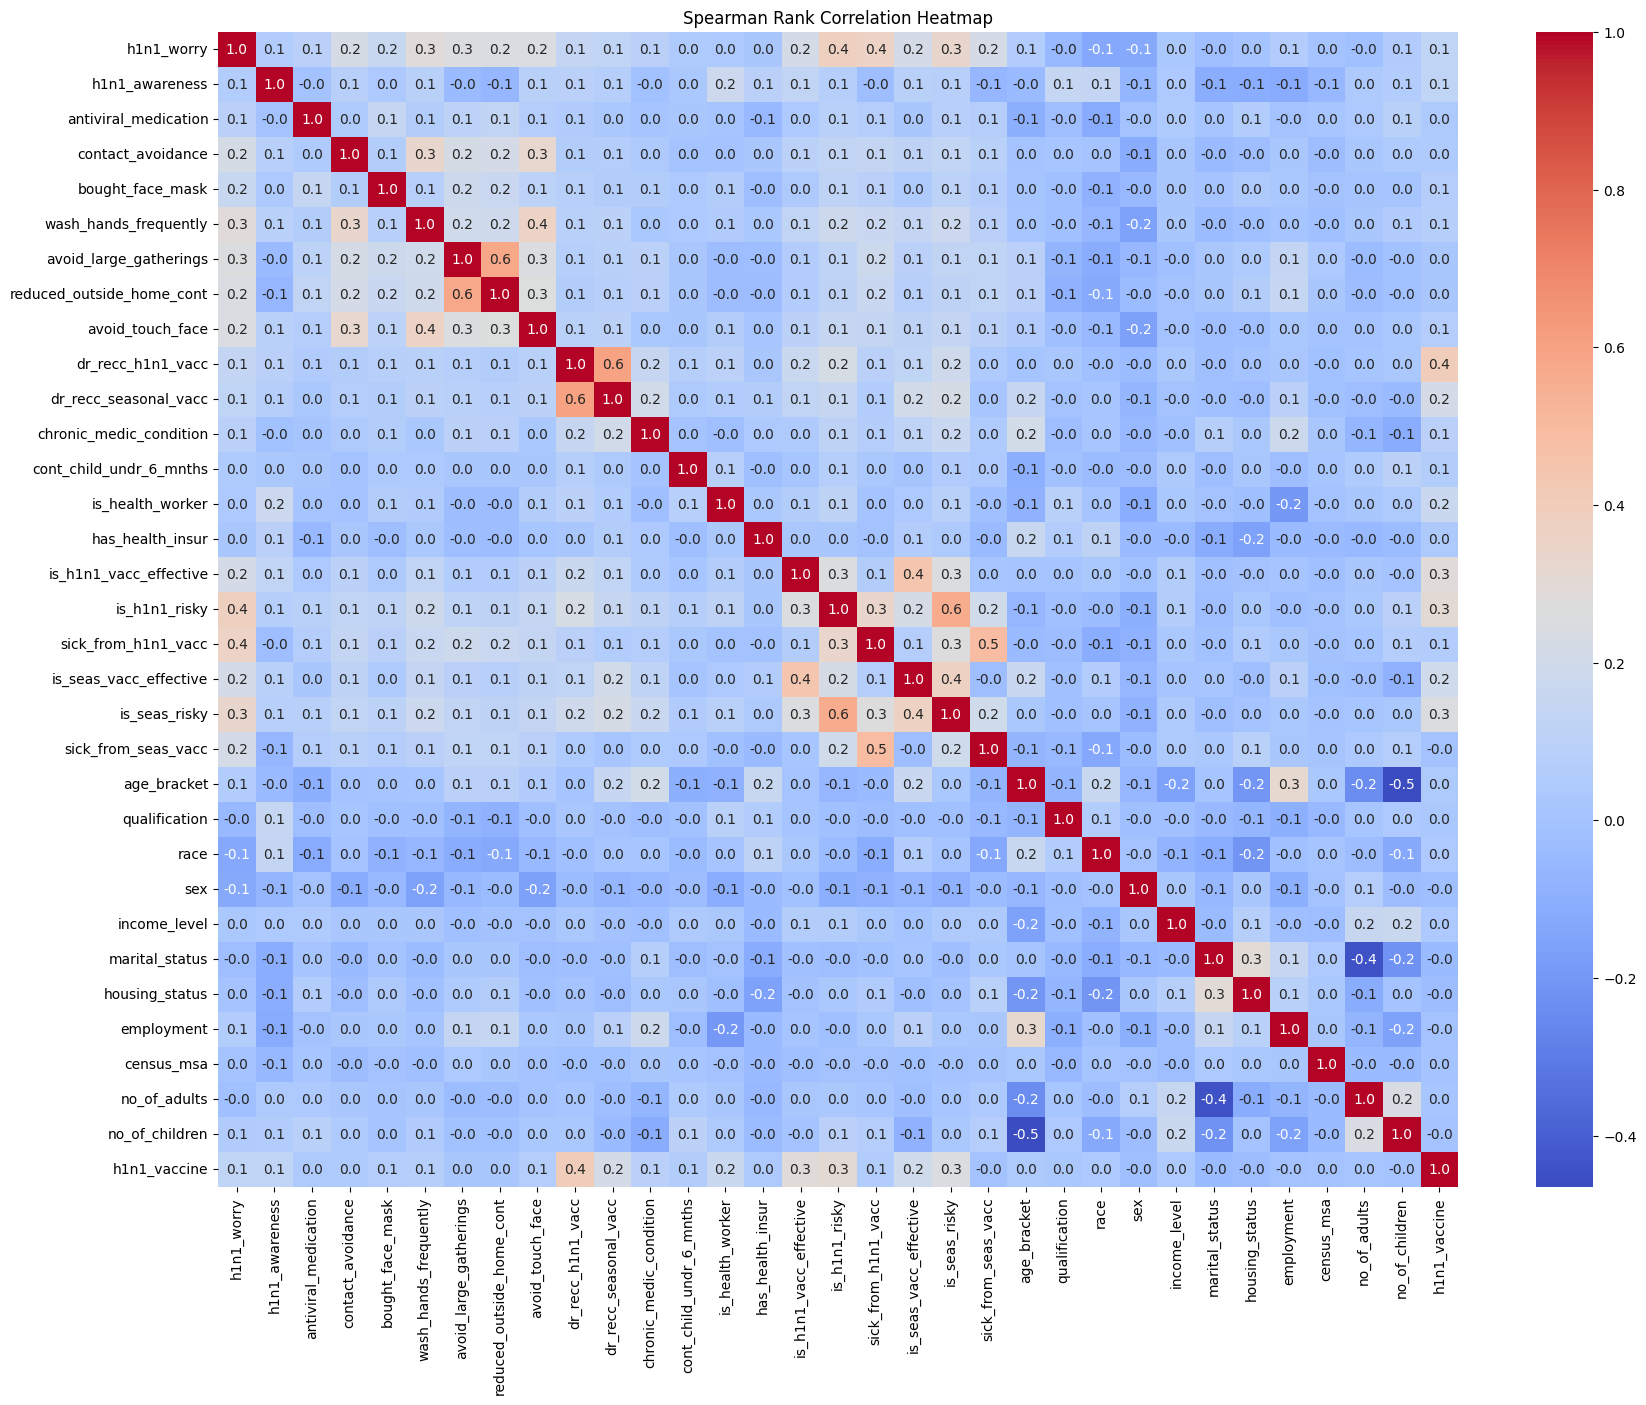

In [ ]:
# EDA

df_corr = vac_final.corr(method='spearman')
plt.figure(figsize=(20,15))
sns.heatmap(df_corr,annot=True,cmap='coolwarm',fmt='0.1f')
plt.title('Spearman Rank Correlation Heatmap')
plt.show()

In [ ]:
# dr_recc_h1n1_vacc
# dr_recc_seasonal_vacc
# is_health_worker
# is_h1n1_vacc_effective
# is_h1n1_risky
# is_seas_vacc_effective
# is_seas_tricky


<Axes: xlabel='h1n1_vaccine'>

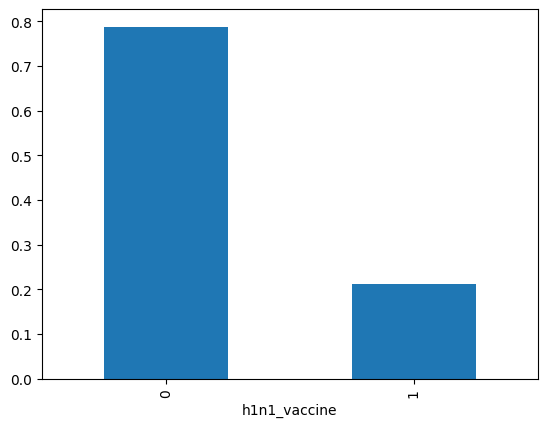

In [ ]:
vac_final['h1n1_vaccine'].value_counts(normalize=True).plot(kind='bar')

<Axes: xlabel='chronic_medic_condition', ylabel='count'>

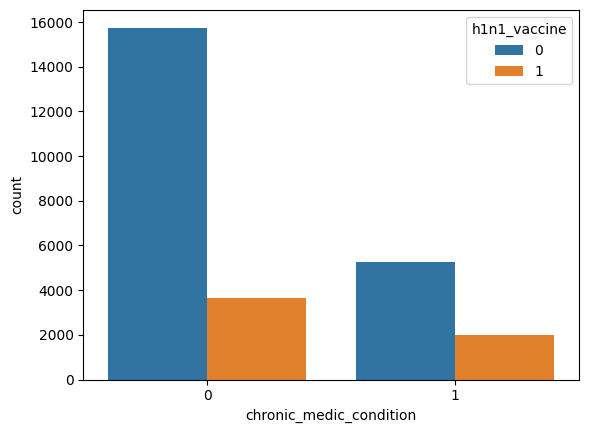

In [ ]:
# the above plot gives us an idea that most of the population haven't taken the vaccination
# let us see the cause behind it
# chronic medical condition

sns.countplot(x='chronic_medic_condition',hue='h1n1_vaccine',data=vac_final)

In [ ]:
# the above plot explains that 0 - people with medic condition do not take vaccine are high in numbers
# 1 - people with medic conditions taking the vaccine are lower
# people with chronic medic conditions have higher risk of getting sick

<Axes: xlabel='h1n1_awareness', ylabel='count'>

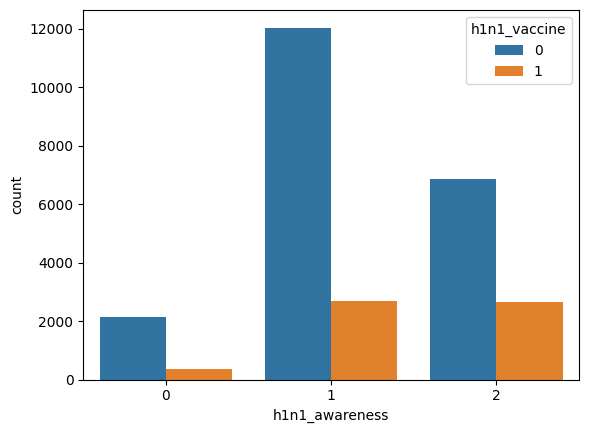

In [ ]:
# let's check the awarness of this vaccination


sns.countplot(x='h1n1_awareness',hue='h1n1_vaccine',data=vac_final)

# 0 - no awarness
# 1 - little awarness
# 2 - enough awarness

In [ ]:
vac_final['age_bracket'].unique()
#['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 #'45 - 54 Years']

array([3, 1, 0, 4, 2])

<Axes: xlabel='age_bracket', ylabel='count'>

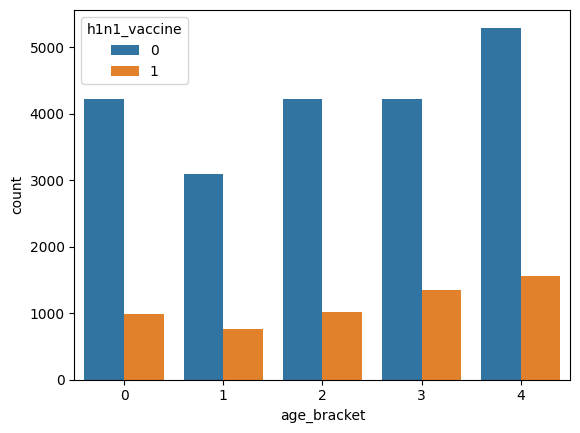

In [ ]:
# analysis based on age group

sns.countplot(x='age_bracket',hue='h1n1_vaccine',data=vac_final)

# 0 - 18 - 34 yrs
# 1 - 35 - 44 yrs
# 2 - 45 - 54 yrs
# 3 - 55 - 64 yrs
# 4 - 65 + yrs

<Axes: xlabel='sex', ylabel='count'>

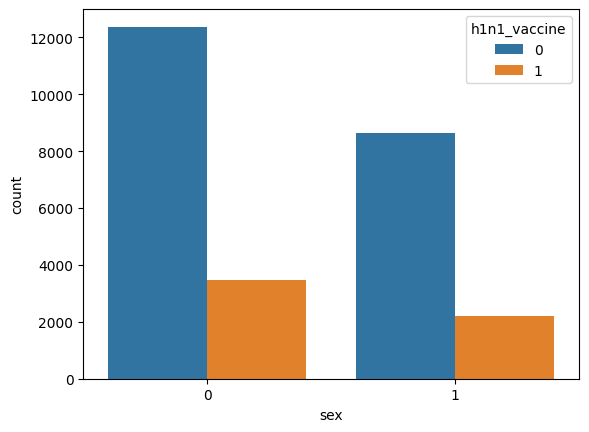

In [ ]:
# analysis based on gender

sns.countplot(x='sex',hue='h1n1_vaccine',data=vac_final)

# 0 - female
# 1 - male

In [ ]:
x = vac_final.drop('h1n1_vaccine',axis=1)
y = vac_final['h1n1_vaccine']

selector = SelectKBest(score_func=f_classif,k=10)
selector.fit(x,y)

selected_features = selector.get_support(indices=True)

print("Selected Features:",selected_features)
print("Selected Feature Names:",x.columns[selected_features])

Selected Features: [ 0  1  9 10 11 13 15 16 18 19]
Selected Feature Names: Index(['h1n1_worry', 'h1n1_awareness', 'dr_recc_h1n1_vacc',
       'dr_recc_seasonal_vacc', 'chronic_medic_condition', 'is_health_worker',
       'is_h1n1_vacc_effective', 'is_h1n1_risky', 'is_seas_vacc_effective',
       'is_seas_risky'],
      dtype='object')


In [ ]:
# I have selected the best features of the dataset using selectkbest for high efficiency

x_new = vac_final[['h1n1_worry','h1n1_awareness','dr_recc_h1n1_vacc','dr_recc_seasonal_vacc','chronic_medic_condition',
                   'is_health_worker','is_h1n1_vacc_effective','is_h1n1_risky','is_seas_vacc_effective','is_seas_risky']]

y_new = vac_final['h1n1_vaccine']

# Model Selection

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,auc,roc_curve,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import pickle
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris


In [ ]:
# checking if the selected dataset is balanced or not

for i in x_new:
    print('value count of',i)
    print(x_new[i].value_counts())
    print('*****************************')

value count of h1n1_worry
h1n1_worry
2    10667
1     8153
3     4591
0     3296
Name: count, dtype: int64
*****************************
value count of h1n1_awareness
h1n1_awareness
1    14714
2     9487
0     2506
Name: count, dtype: int64
*****************************
value count of dr_recc_h1n1_vacc
dr_recc_h1n1_vacc
0    21299
1     5408
Name: count, dtype: int64
*****************************
value count of dr_recc_seasonal_vacc
dr_recc_seasonal_vacc
0    18613
1     8094
Name: count, dtype: int64
*****************************
value count of chronic_medic_condition
chronic_medic_condition
0    19417
1     7290
Name: count, dtype: int64
*****************************
value count of is_health_worker
is_health_worker
0    23808
1     2899
Name: count, dtype: int64
*****************************
value count of is_h1n1_vacc_effective
is_h1n1_vacc_effective
4    12074
5     7166
3     4723
2     1858
1      886
Name: count, dtype: int64
*****************************
value count of is_h1n1_

In [ ]:
# it seems like the data is imbalanced
# we need to balance the data using smote

X_resampled, y_resampled = SMOTE().fit_resample(x_new, y_new)


In [ ]:
for i in X_resampled:
    print('value count of',i)
    print(X_resampled[i].value_counts())
    print('*****************************')

value count of h1n1_worry
h1n1_worry
2    17660
1    12027
3     7721
0     4658
Name: count, dtype: int64
*****************************
value count of h1n1_awareness
h1n1_awareness
1    22407
2    16095
0     3564
Name: count, dtype: int64
*****************************
value count of dr_recc_h1n1_vacc
dr_recc_h1n1_vacc
0    29272
1    12794
Name: count, dtype: int64
*****************************
value count of dr_recc_seasonal_vacc
dr_recc_seasonal_vacc
0    26730
1    15336
Name: count, dtype: int64
*****************************
value count of chronic_medic_condition
chronic_medic_condition
0    30109
1    11957
Name: count, dtype: int64
*****************************
value count of is_health_worker
is_health_worker
0    36562
1     5504
Name: count, dtype: int64
*****************************
value count of is_h1n1_vacc_effective
is_h1n1_vacc_effective
4    18690
5    14083
3     6153
2     2117
1     1023
Name: count, dtype: int64
*****************************
value count of is_h1n1_

In [ ]:
def model_selection(X_data,Y_data,algorithm):
  x_test,x_train,y_test,y_train = train_test_split(X_data,Y_data,test_size=0.2,random_state=42)
  model = algorithm().fit(x_train,y_train)
  y_pred_train = model.predict(x_train)
  y_pred_test = model.predict(x_test)

  accuracy_train = accuracy_score(y_train,y_pred_train)
  accuracy_test = accuracy_score(y_test,y_pred_test)

  metrics = {'algorithm':algorithm.__name__,'accuracy_train':accuracy_train,'accuracy_test':accuracy_test}
  classification_report_test =classification_report(y_test,y_pred_test)

  return metrics


In [ ]:
print(model_selection(X_resampled,y_resampled,LogisticRegression))
print(model_selection(X_resampled,y_resampled,DecisionTreeClassifier))
print(model_selection(X_resampled,y_resampled,RandomForestClassifier))
print(model_selection(X_resampled,y_resampled,ExtraTreesClassifier))
print(model_selection(X_resampled,y_resampled,AdaBoostClassifier))
print(model_selection(X_resampled,y_resampled,GradientBoostingClassifier))
print(model_selection(X_resampled,y_resampled,XGBClassifier))


{'algorithm': 'LogisticRegression', 'accuracy_train': 0.7403137627763252, 'accuracy_test': 0.7393914180435041}
{'algorithm': 'DecisionTreeClassifier', 'accuracy_train': 0.8630853339671976, 'accuracy_test': 0.7288125520028528}
{'algorithm': 'RandomForestClassifier', 'accuracy_train': 0.8630853339671976, 'accuracy_test': 0.7504754546535124}
{'algorithm': 'ExtraTreesClassifier', 'accuracy_train': 0.8630853339671976, 'accuracy_test': 0.7429573279448473}
{'algorithm': 'AdaBoostClassifier', 'accuracy_train': 0.7390064178749702, 'accuracy_test': 0.73870795197908}
{'algorithm': 'GradientBoostingClassifier', 'accuracy_train': 0.7524364154979796, 'accuracy_test': 0.7443836919053846}
{'algorithm': 'XGBClassifier', 'accuracy_train': 0.8130496791062515, 'accuracy_test': 0.7486924997028408}


In [ ]:
# from the above data I have logistic regression to be reasonable and avoid overfitting

# I need to further hypertune and get the parameter which would further increase the accuracy of the model

data = load_digits()
x = X_resampled
y = y_resampled

model = LogisticRegression(max_iter=1000)

param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5,scoring='accuracy',random_state=42)
random_search.fit(x, y)

print("Best Parameters:", random_search.best_params_)

Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}


In [ ]:
def logistic_regression(X_data,Y_data):

  x_test,x_train,y_test,y_train = train_test_split(X_data,Y_data,test_size=0.2,random_state=42)
  model = LogisticRegression(C=1,penalty='l1',solver='saga',max_iter=1000).fit(x_train,y_train)
  y_pred_train = model.predict(x_train)
  y_pred_test = model.predict(x_test)

  accuracy_train = accuracy_score(y_train,y_pred_train)
  accuracy_test = accuracy_score(y_test,y_pred_test)
  print('accuracy train',accuracy_train)
  print('accuracy test',accuracy_test)
  print('classification report')
  print(classification_report(y_test,y_pred_test))

  return model


In [ ]:
logistic_regression(X_resampled,y_resampled)

accuracy train 0.7403137627763252
accuracy test 0.7393319862118151
classification report
              precision    recall  f1-score   support

           0       0.72      0.79      0.75     16746
           1       0.77      0.69      0.73     16906

    accuracy                           0.74     33652
   macro avg       0.74      0.74      0.74     33652
weighted avg       0.74      0.74      0.74     33652



LogisticRegression(C=1, max_iter=1000, penalty='l1', solver='saga')

In [ ]:
# with all the feature engineering and hypertuning this is the max acheived accuracy - 74%

In [ ]:
# without feature engineering

x = vac_final.drop('h1n1_vaccine',axis=1)
y = vac_final['h1n1_vaccine']

print(model_selection(x,y,LogisticRegression))
print(model_selection(x,y,DecisionTreeClassifier))
print(model_selection(x,y,RandomForestClassifier))
print(model_selection(x,y,ExtraTreesClassifier))
print(model_selection(x,y,AdaBoostClassifier))
print(model_selection(x,y,GradientBoostingClassifier))
print(model_selection(x,y,XGBClassifier))


{'algorithm': 'LogisticRegression', 'accuracy_train': 0.8414451516286036, 'accuracy_test': 0.833278726889773}
{'algorithm': 'DecisionTreeClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.7447694827989703}
{'algorithm': 'RandomForestClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.8301895623683595}
{'algorithm': 'ExtraTreesClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.830095951322256}
{'algorithm': 'AdaBoostClassifier', 'accuracy_train': 0.8406963684013478, 'accuracy_test': 0.8327638661362041}
{'algorithm': 'GradientBoostingClassifier', 'accuracy_train': 0.8590415574691127, 'accuracy_test': 0.8359934472267727}
{'algorithm': 'XGBClassifier', 'accuracy_train': 0.9784724822163984, 'accuracy_test': 0.8184881816054295}


In [ ]:
# randomisedcv hypertune


data = load_digits()
x_d = x
y_d = y

model = LogisticRegression(max_iter=1000)

param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5,scoring='accuracy',random_state=42)
random_search.fit(x, y)

print("Best Parameters:", random_search.best_params_)

Best Parameters: {'solver': 'saga', 'penalty': 'l1', 'C': 0.1}


In [ ]:
def logistic_regression(X_data,Y_data):

  x_test,x_train,y_test,y_train = train_test_split(X_data,Y_data,test_size=0.2,random_state=42)
  model = LogisticRegression(C=0.1,penalty='l1',solver='saga',max_iter=1000).fit(x_train,y_train)
  y_pred_train = model.predict(x_train)
  y_pred_test = model.predict(x_test)

  accuracy_train = accuracy_score(y_train,y_pred_train)
  accuracy_test = accuracy_score(y_test,y_pred_test)
  print('accuracy train',accuracy_train)
  print('accuracy test',accuracy_test)
  print('classification report')
  print(classification_report(y_test,y_pred_test))

  return model

In [ ]:
logistic_regression(x,y)

accuracy train 0.8380756271059528
accuracy test 0.8325766440439972
classification report
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     16821
           1       0.67      0.41      0.51      4544

    accuracy                           0.83     21365
   macro avg       0.77      0.68      0.70     21365
weighted avg       0.82      0.83      0.82     21365



LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='saga')

In [ ]:
# saving the model

with open('model_log_reg.pkl','wb') as f:
    pickle.dump(logistic_regression(x,y),f)

accuracy train 0.8378884312991389
accuracy test 0.8325766440439972
classification report
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     16821
           1       0.67      0.41      0.51      4544

    accuracy                           0.83     21365
   macro avg       0.77      0.68      0.70     21365
weighted avg       0.82      0.83      0.82     21365



In [ ]:
with open('model_log_reg.pkl','rb') as f:
    model = pickle.load(f)

In [ ]:
user_data = np.array([[1,3,2,1,1,2,3,2,1,2,3,1,2,3,2,12,3,1,2,2,3,2,1,3,2,12,3,2,1,2,2,3]])
y_pred = model.predict(user_data)
y_pred

array([1])